
HomeWork. Apply All models on multiclass data online gaming behaviour considering engagement level as target value. Find the best suited model and perform hyperparameter tuning of it

### ML Algorithm to be Applied

- Naive Bayes
- K Nearest Neigbor (KNN)
- Decision Tree
- Random Forest

In [9]:
# Importing Labraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
# Loading and Reading the Data

df = pd.read_csv('online_gaming_behavior_dataset.csv')
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [12]:
# Checking the Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [14]:
# Statistical Summary
df.describe()

# Mean and Median are close but standard Deviation is varing
# We need to standarize this data

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [15]:
# Checking for any Null Values
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [43]:
df.EngagementLevel.value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

In [71]:
# Extract Features and Target variables.

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# X = df.drop(columns = ['EngagementLevel'])
# y = df['EngagementLevel']

In [72]:
X.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')

In [73]:
y

0        Medium
1        Medium
2          High
3        Medium
4        Medium
          ...  
40029    Medium
40030      High
40031      High
40032    Medium
40033    Medium
Name: EngagementLevel, Length: 40034, dtype: object

In [74]:
# label Encode the string variable to Numerical.

cat_col = X.select_dtypes(include = 'object').columns
print(cat_col)

label_encoders = {}
for col in cat_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty'], dtype='object')


In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  int64  
 3   Location                   40034 non-null  int64  
 4   GameGenre                  40034 non-null  int64  
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  int64  
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 3.7 MB


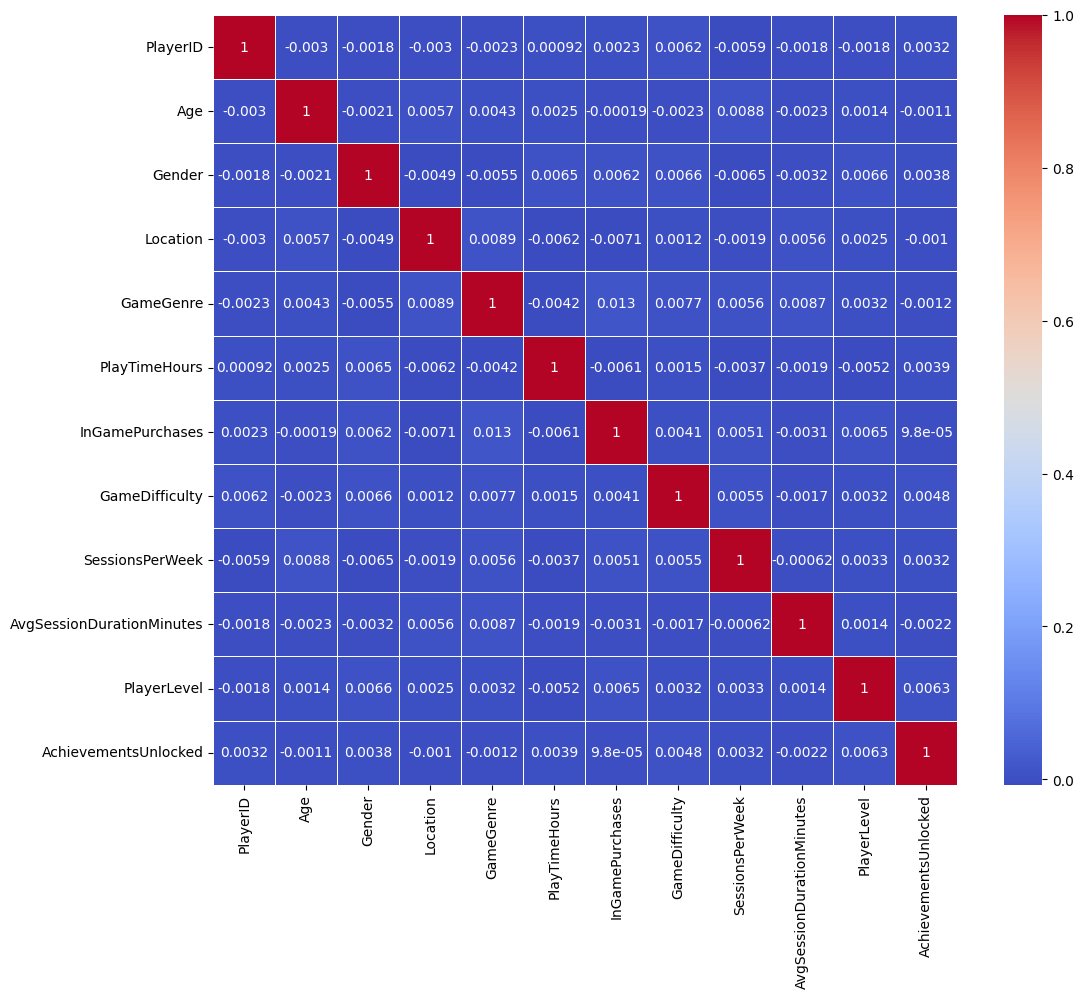

In [76]:
# Creating Heatmap to check any variables creating High Correaltion

corr = X.corr()
plt.figure (figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.show()

In [77]:
# Perfomr Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [78]:
# Apply Standard Scalar to X_train, X_test

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [82]:
# Apply Naive Bayes Algorithm on the training Data

nb = GaussianNB()

nb.fit(X_train_scaled, y_train)

GaussianNB()

In [84]:
# Making Prediction on train and test Data

y_pred_train_nb = nb.predict(X_train_scaled)
y_pred_test_nb = nb.predict(X_test_scaled)

In [90]:
# Predicting the probabilites on test Data

y_pred_test_prob_nb = nb.predict_proba(X_test)[:,1]

C:\Users\0litt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [93]:
# Calculate the training and Testing Accuracy

training_accuracy = accuracy_score(y_train, y_pred_train_nb)
testing_accuracy = accuracy_score(y_test, y_pred_test_nb)

print('Accuracy Score using Naive Bayes')
print('-------------------------------------------')
print(f'Training Accuracy : {training_accuracy:.4f}')
print(f'Testing Accuracy : {testing_accuracy:.4f}')

Accuracy Score using Naive Bayes
-------------------------------------------
Training Accuracy : 0.8412
Testing Accuracy : 0.8405


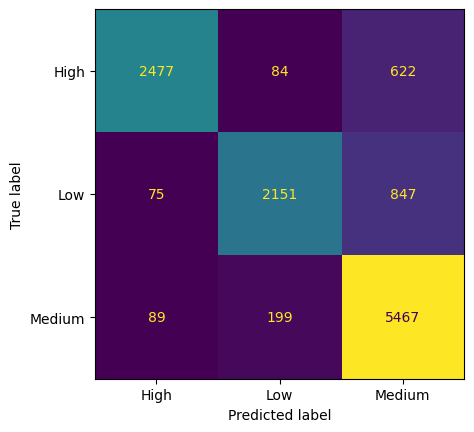

In [110]:
conf_mat_nb = confusion_matrix(y_test, y_pred_test_nb)

from sklearn.metrics import ConfusionMatrixDisplay

conf_mat_nb_dis = ConfusionMatrixDisplay(confusion_matrix = conf_mat_nb, display_labels = ['High','Low','Medium'])
conf_mat_nb_dis.plot(colorbar = False)
plt.show()

In [122]:
clf = classification_report(y_test, y_pred_test_nb)
print(clf)


              precision    recall  f1-score   support

        High       0.94      0.78      0.85      3183
         Low       0.88      0.70      0.78      3073
      Medium       0.79      0.95      0.86      5755

    accuracy                           0.84     12011
   macro avg       0.87      0.81      0.83     12011
weighted avg       0.85      0.84      0.84     12011



In [104]:
y_test.value_counts()

EngagementLevel
Medium    5755
High      3183
Low       3073
Name: count, dtype: int64

### Automating the rest of the model to check the Accuracy Score
- KNeighborsClassifier()
- DecisionTreeClassifier()
- RandomForestClassifier()

In [130]:
# Creating a model of all the classification algorithm and passing a list to it 

models = [KNeighborsClassifier(),
          DecisionTreeClassifier(criterion = 'entropy', max_depth = 9),
          RandomForestClassifier(criterion = 'entropy', n_estimators = 50)]

In [131]:
# Creating a for loop and passing the models

for model in models:
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_test_pred)
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    clf = classification_report(y_test, y_test_pred)
    print(f'{model} model Performance Parameters')
    print(f'---------------------------------------')
    print(f'The Train Accuracy score for {model} model is {train_acc}')
    print(f'The Test Accuracy score for {model} model is {acc:.5f}\n')
    print(f'Classification Report for {model} model is  {clf}\n \n')

KNeighborsClassifier() model Performance Parameters
---------------------------------------
The Train Accuracy score for KNeighborsClassifier() model is 0.8343860400385398
The Test Accuracy score for KNeighborsClassifier() model is 0.74865

Classification Report for KNeighborsClassifier() model is                precision    recall  f1-score   support

        High       0.81      0.76      0.78      3183
         Low       0.72      0.62      0.67      3073
      Medium       0.73      0.81      0.77      5755

    accuracy                           0.75     12011
   macro avg       0.75      0.73      0.74     12011
weighted avg       0.75      0.75      0.75     12011

 

DecisionTreeClassifier(criterion='entropy', max_depth=9) model Performance Parameters
---------------------------------------
The Train Accuracy score for DecisionTreeClassifier(criterion='entropy', max_depth=9) model is 0.9208864147307568
The Test Accuracy score for DecisionTreeClassifier(criterion='entropy', max_